# 🍕 Pizza Place Sales Analysis
### A year's worth of sales data from a fictitious pizza restaurant

This notebook analyzes sales data from four datasets:
- **Orders**: Date and time of each order
- **Order Details**: Pizzas and quantities per order
- **Pizzas**: Pizza sizes and prices
- **Pizza Types**: Pizza names, categories, and ingredients

## 📦 Setup & Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')

# Plot styling
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['font.size'] = 11

BRAND_COLOR = '#E63946'
BAR_COLOR   = '#E63946'
LINE_COLOR  = '#457B9D'

print('Libraries loaded ✅')

Libraries loaded ✅


In [2]:
# Load the four datasets
orders       = pd.read_csv('orders.csv')
order_details= pd.read_csv('order_details.csv')
pizzas       = pd.read_csv('pizzas.csv')
pizza_types  = pd.read_csv('pizza_types.csv', encoding='latin1')

print('Dataset shapes:')
print(f'  orders:       {orders.shape}')
print(f'  order_details:{order_details.shape}')
print(f'  pizzas:       {pizzas.shape}')
print(f'  pizza_types:  {pizza_types.shape}')

Dataset shapes:
  orders:       (21350, 3)
  order_details:(48620, 4)
  pizzas:       (96, 4)
  pizza_types:  (32, 4)


In [3]:
# Merge all four datasets into a single DataFrame
df = (
    order_details
    .merge(pizzas,      on='pizza_id')
    .merge(pizza_types, on='pizza_type_id')
    .merge(orders,      on='order_id')
)

# Feature engineering
df['date']     = pd.to_datetime(df['date'])
df['hour']     = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df['day_name'] = df['date'].dt.day_name()
df['month']    = df['date'].dt.month
df['revenue']  = df['quantity'] * df['price']

print(f'Merged DataFrame shape: {df.shape}')
df.head(3)

Merged DataFrame shape: (48620, 16)


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,hour,day_name,month,revenue
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,11,Thursday,1,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,11,Thursday,1,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,11,Thursday,1,18.50


---
## Q1. What is the total revenue / sales?

In [4]:
total_revenue = df['revenue'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')

Total Revenue: $817,860.05


**💡 Insight:** The pizza place generated **\$817,860.05** in total revenue over the year — a strong performance for a single-location restaurant, averaging roughly **\$68,155/month** or about **\$2,240/day**.

---
## Q2. What is the total quantity sold?

In [5]:
total_qty = df['quantity'].sum()
print(f'Total Pizzas Sold: {total_qty:,}')

Total Pizzas Sold: 49,574


**💡 Insight:** A total of **49,574 pizzas** were sold throughout the year. That's roughly **136 pizzas per day** — a busy but manageable volume for a single pizza place.

---
## Q3. What is the total number of orders?

In [6]:
total_orders = df['order_id'].nunique()
print(f'Total Orders: {total_orders:,}')

Total Orders: 21,350


**💡 Insight:** There were **21,350 unique orders** placed during the year. With 49,574 pizzas across 21,350 orders, customers ordered roughly **2.3 pizzas per order** on average — suggesting a mix of individual and group/family orders.

---
## Q4. How many pizza types do they sell?

In [7]:
num_types = df['pizza_type_id'].nunique()
print(f'Number of Pizza Types: {num_types}')
print()
print('By Category:')
print(df.drop_duplicates('pizza_type_id')['category'].value_counts().to_string())

Number of Pizza Types: 32

By Category:
category
Veggie     9
Supreme    9
Classic    8
Chicken    6


**💡 Insight:** The restaurant offers **32 distinct pizza types** across 4 categories: Classic, Chicken, Supreme, and Veggie. This is a solid menu size — broad enough to appeal to different tastes without being overwhelming.

---
## Q5. What is the average price of the pizzas?

In [8]:
avg_price = df['price'].mean()
print(f'Average Pizza Price: ${avg_price:.2f}')

print('\nAverage Price by Size:')
print(df.groupby('size')['price'].mean().sort_values().apply(lambda x: f'${x:.2f}').to_string())

print('\nAverage Price by Category:')
print(df.drop_duplicates('pizza_id').groupby('category')['price'].mean().sort_values(ascending=False).apply(lambda x: f'${x:.2f}').to_string())

Average Pizza Price: $16.49

Average Price by Size:
size
S      $12.36
M      $15.95
L      $19.80
XL     $25.50
XXL    $35.95

Average Price by Category:
category
Supreme    $16.79
Chicken    $16.75
Veggie     $16.36
Classic    $16.18


**💡 Insight:** The average pizza price is **\$16.49**. Prices scale naturally with size (S → M → L → XL → XXL). Among categories, Supreme and Chicken pizzas tend to be slightly pricier than Classic and Veggie options, which aligns with the more premium ingredients they use.

---
## Q6. What are the peak hours of sales?

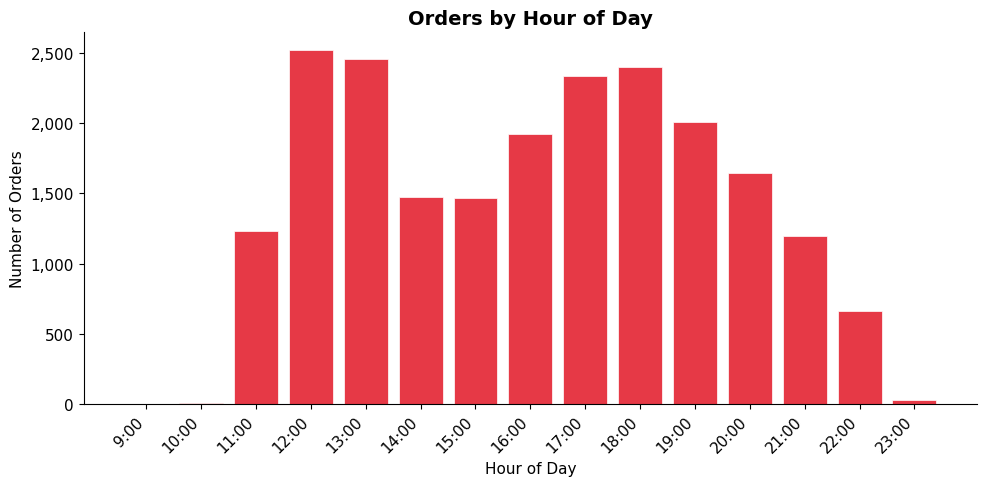

Top 5 Peak Hours:
hour
12    2,520 orders
13    2,455 orders
18    2,399 orders
17    2,336 orders
19    2,009 orders


In [9]:
hourly_orders = df.groupby('hour')['order_id'].nunique().sort_index()

fig, ax = plt.subplots()
bars = ax.bar(hourly_orders.index, hourly_orders.values, color=BAR_COLOR, edgecolor='white', linewidth=0.5)

# Highlight top hours
for bar, val in zip(bars, hourly_orders.values):
    if val >= 5000:
        bar.set_color('#A4131E')

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Orders')
ax.set_title('Orders by Hour of Day', fontsize=14, fontweight='bold')
ax.set_xticks(hourly_orders.index)
ax.set_xticklabels([f'{h}:00' for h in hourly_orders.index], rotation=45, ha='right')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.savefig('peak_hours.png', dpi=150, bbox_inches='tight')
plt.show()

print('Top 5 Peak Hours:')
print(hourly_orders.sort_values(ascending=False).head(5).apply(lambda x: f'{x:,} orders').to_string())

**💡 Insight:** Sales peak sharply at **12:00 PM (noon)** and **1:00 PM**, confirming a strong lunch rush. A secondary dinner peak occurs between **5:00 PM and 7:00 PM**. These two windows account for the majority of daily orders, making them critical for staffing and inventory planning.

---
## Q7. Total sales by day of week — which day is best?

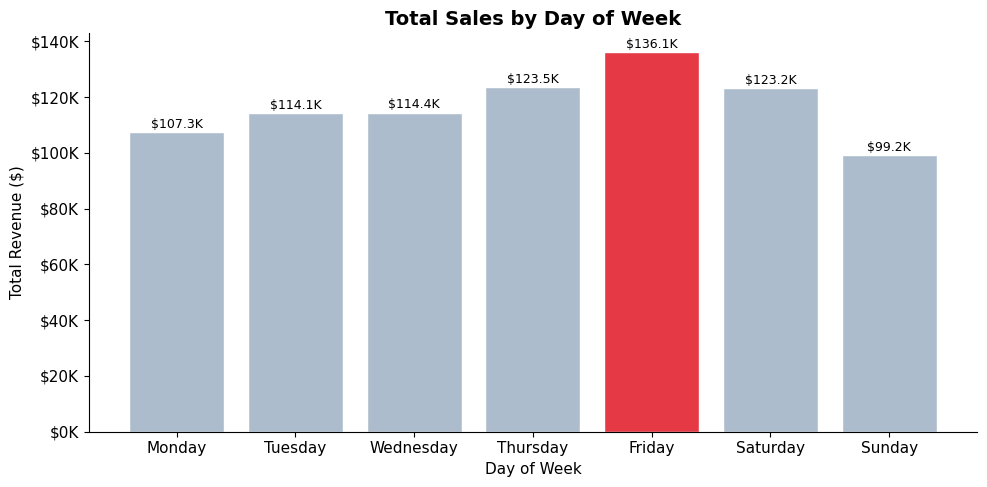

Sales by Day (sorted):
day_name
Friday       $136,073.90
Thursday     $123,528.50
Saturday     $123,182.40
Wednesday    $114,408.40
Tuesday      $114,133.80
Monday       $107,329.55
Sunday        $99,203.50


In [10]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_sales = df.groupby('day_name')['revenue'].sum().reindex(day_order)

colors = [BRAND_COLOR if d == 'Friday' else '#ADBCCC' for d in day_order]

fig, ax = plt.subplots()
bars = ax.bar(daily_sales.index, daily_sales.values, color=colors, edgecolor='white')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Revenue ($)')
ax.set_title('Total Sales by Day of Week', fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))

for bar, val in zip(bars, daily_sales.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
            f'${val/1000:.1f}K', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('daily_sales.png', dpi=150, bbox_inches='tight')
plt.show()

print('Sales by Day (sorted):')
print(daily_sales.sort_values(ascending=False).apply(lambda x: f'${x:,.2f}').to_string())

**💡 Insight:** **Friday is the top-performing day** with \$136,074 in revenue — about 37% more than Sunday, the slowest day (\$99,204). The weekend (Fri–Sat) drives the most business, while Sunday underperforms compared to weekdays. Consider promotions on slower days (Sunday/Monday) to balance demand.

---
## Q8. Top 5 bestselling pizzas

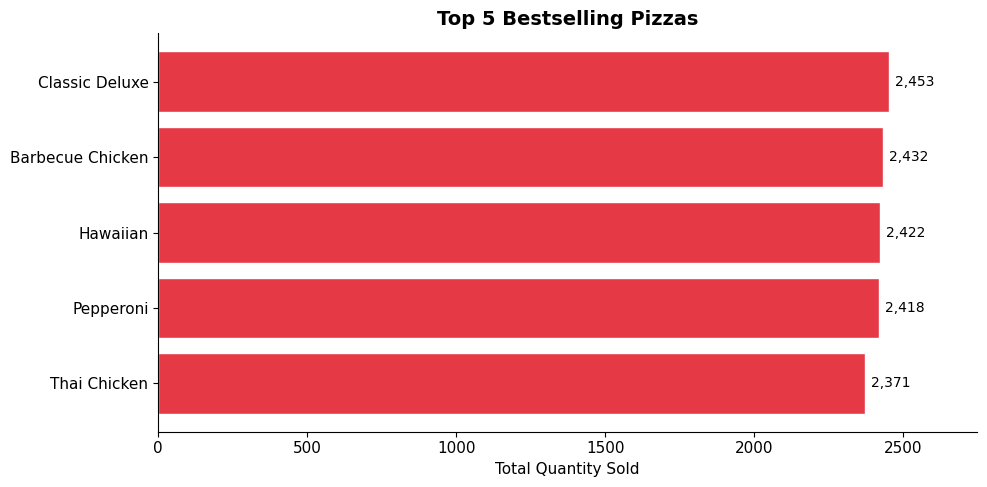

name
The Classic Deluxe Pizza      2,453 units
The Barbecue Chicken Pizza    2,432 units
The Hawaiian Pizza            2,422 units
The Pepperoni Pizza           2,418 units
The Thai Chicken Pizza        2,371 units


In [11]:
top5 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

fig, ax = plt.subplots()
bars = ax.barh(top5.index[::-1], top5.values[::-1], color=BAR_COLOR, edgecolor='white')

for bar, val in zip(bars, top5.values[::-1]):
    ax.text(bar.get_width() + 20, bar.get_y() + bar.get_height()/2,
            f'{val:,}', va='center', fontsize=10)

ax.set_xlabel('Total Quantity Sold')
ax.set_title('Top 5 Bestselling Pizzas', fontsize=14, fontweight='bold')
ax.set_xlim(0, top5.max() * 1.12)

# Shorten long names for display
short_labels = [n.replace('The ','').replace(' Pizza','') for n in top5.index[::-1]]
ax.set_yticklabels(short_labels)

plt.tight_layout()
plt.savefig('top5_pizzas.png', dpi=150, bbox_inches='tight')
plt.show()

print(top5.apply(lambda x: f'{x:,} units').to_string())

**💡 Insight:** The **Classic Deluxe Pizza** leads sales at 2,453 units, closely followed by the **Barbecue Chicken** (2,432) and **Hawaiian** (2,422) pizzas. The top 5 are remarkably close in volume, suggesting no single pizza dominates — customers enjoy variety. These core pizzas should always be well-stocked.

---
## Q9. Monthly sales — any trends?

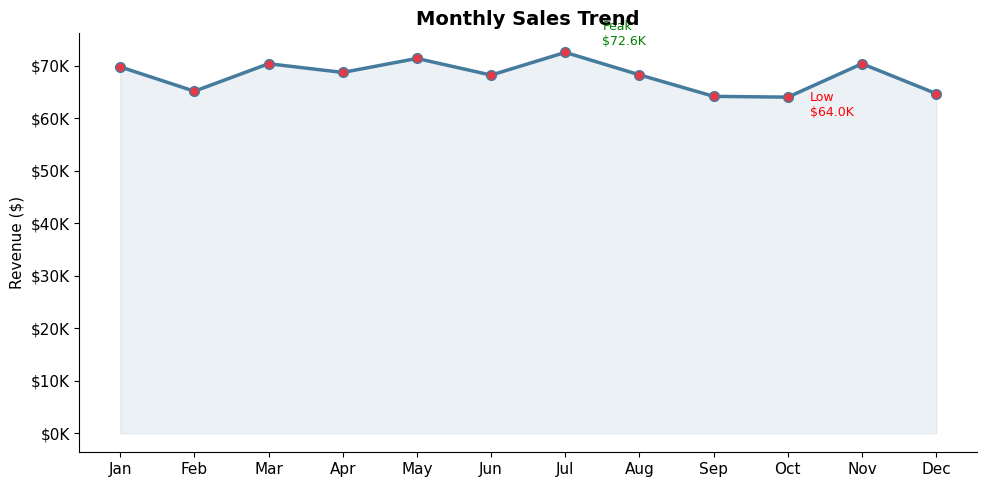

Monthly Revenue:
  Jan: $69,793.30
  Feb: $65,159.60
  Mar: $70,397.10
  Apr: $68,736.80
  May: $71,402.75
  Jun: $68,230.20
  Jul: $72,557.90
  Aug: $68,278.25
  Sep: $64,180.05
  Oct: $64,027.60
  Nov: $70,395.35
  Dec: $64,701.15


In [12]:
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_sales = df.groupby('month')['revenue'].sum()

fig, ax = plt.subplots()
ax.plot(monthly_sales.index, monthly_sales.values, color=LINE_COLOR, linewidth=2.5, marker='o', markersize=7, markerfacecolor=BRAND_COLOR)
ax.fill_between(monthly_sales.index, monthly_sales.values, alpha=0.1, color=LINE_COLOR)

ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)
ax.set_ylabel('Revenue ($)')
ax.set_title('Monthly Sales Trend', fontsize=14, fontweight='bold')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))

# Annotate peak and trough
peak_m = monthly_sales.idxmax()
low_m  = monthly_sales.idxmin()
ax.annotate(f'Peak\n${monthly_sales[peak_m]/1000:.1f}K', xy=(peak_m, monthly_sales[peak_m]),
            xytext=(peak_m+0.5, monthly_sales[peak_m]+1500), fontsize=9, color='green')
ax.annotate(f'Low\n${monthly_sales[low_m]/1000:.1f}K', xy=(low_m, monthly_sales[low_m]),
            xytext=(low_m+0.3, monthly_sales[low_m]-3500), fontsize=9, color='red')

plt.tight_layout()
plt.savefig('monthly_sales.png', dpi=150, bbox_inches='tight')
plt.show()

print('Monthly Revenue:')
for m, rev in monthly_sales.items():
    print(f'  {month_names[m-1]:>3}: ${rev:,.2f}')

**💡 Insight:** Sales are relatively **consistent throughout the year**, ranging between ~\$64K and ~\$72K per month. A few patterns stand out:
- **July** is the best month (\$72,558), likely boosted by summer gatherings and events.
- **October** is the lowest month (\$64,028), which is somewhat unexpected — a fall promotion could help.
- **February** also dips, possibly due to the shorter month and fewer days.
- There is **no dramatic seasonality**, meaning the restaurant has a stable, year-round customer base.

---
## Q10. Are there pizza types that are underperforming?

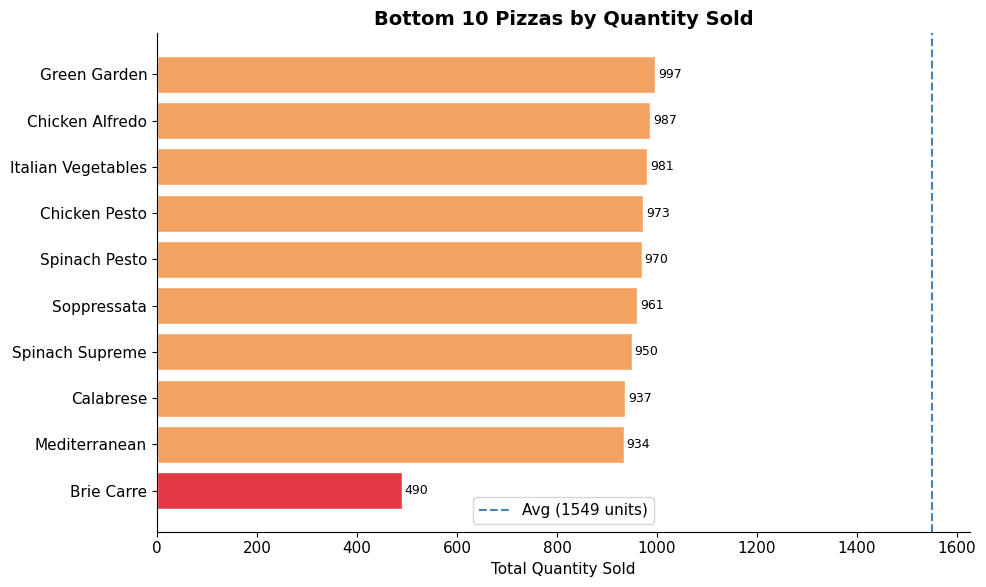

Average sales per pizza type: 1549 units

Underperforming pizzas (bottom 5):
name
The Brie Carre Pizza         490 units
The Mediterranean Pizza      934 units
The Calabrese Pizza          937 units
The Spinach Supreme Pizza    950 units
The Soppressata Pizza        961 units


In [13]:
pizza_sales = df.groupby('name')['quantity'].sum().sort_values()
bottom10 = pizza_sales.head(10)
avg_qty = pizza_sales.mean()

colors = ['#E63946' if v < avg_qty * 0.5 else '#F4A261' for v in bottom10.values]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(bottom10.index, bottom10.values, color=colors, edgecolor='white')

ax.axvline(avg_qty, color='steelblue', linestyle='--', linewidth=1.5, label=f'Avg ({avg_qty:.0f} units)')
ax.legend()

for bar, val in zip(bars, bottom10.values):
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
            f'{val:,}', va='center', fontsize=9)

ax.set_xlabel('Total Quantity Sold')
ax.set_title('Bottom 10 Pizzas by Quantity Sold', fontsize=14, fontweight='bold')

short_labels = [n.replace('The ','').replace(' Pizza','') for n in bottom10.index]
ax.set_yticklabels(short_labels)

plt.tight_layout()
plt.savefig('bottom_pizzas.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'Average sales per pizza type: {avg_qty:.0f} units\n')
print('Underperforming pizzas (bottom 5):')
print(bottom10.head(5).apply(lambda x: f'{x:,} units').to_string())

**💡 Insight:** The **Brie Carre Pizza** is the clear underperformer with only **490 units sold** — less than **a third of the average** (≈1,550 units per type). This is a significant gap. The next weakest are the **Mediterranean** (934) and **Calabrese** (937) pizzas, selling at about 60% of average.

**Recommendations:**
- **Brie Carre** should be a top candidate for **removal or reformulation** — it may be too niche (Brie cheese, unconventional flavors) for this restaurant's audience.
- Consider **promotions or combo deals** for the Mediterranean and Calabrese to boost their numbers before deciding to remove them.
- Conduct a **profitability check** — some low-volume pizzas may have higher margins that justify keeping them on the menu.

---
## 📋 Executive Summary

| Metric | Value |
|--------|-------|
| Total Revenue | \$817,860.05 |
| Total Pizzas Sold | 49,574 |
| Total Orders | 21,350 |
| Unique Pizza Types | 32 |
| Average Pizza Price | \$16.49 |
| Busiest Hour | 12:00 PM (noon) |
| Best Day | Friday |
| Best Month | July |
| #1 Bestseller | Classic Deluxe Pizza |
| Biggest Underperformer | Brie Carre Pizza |

### Key Takeaways
1. **Revenue is healthy** at ~\$818K/year with strong lunch and dinner rushes — staffing should be concentrated around 11AM–2PM and 5PM–8PM.
2. **Friday drives the most sales** — it's worth exploring late-night or family deals to maximize Friday revenue further.
3. **Menu rationalization** is needed — the Brie Carre Pizza significantly underperforms and may be hurting kitchen efficiency. Replacing it with a more crowd-pleasing option could drive incremental sales.
4. **Sales are stable year-round** with mild seasonal variation — the restaurant is not overly dependent on any single season, which is a sign of a loyal customer base.